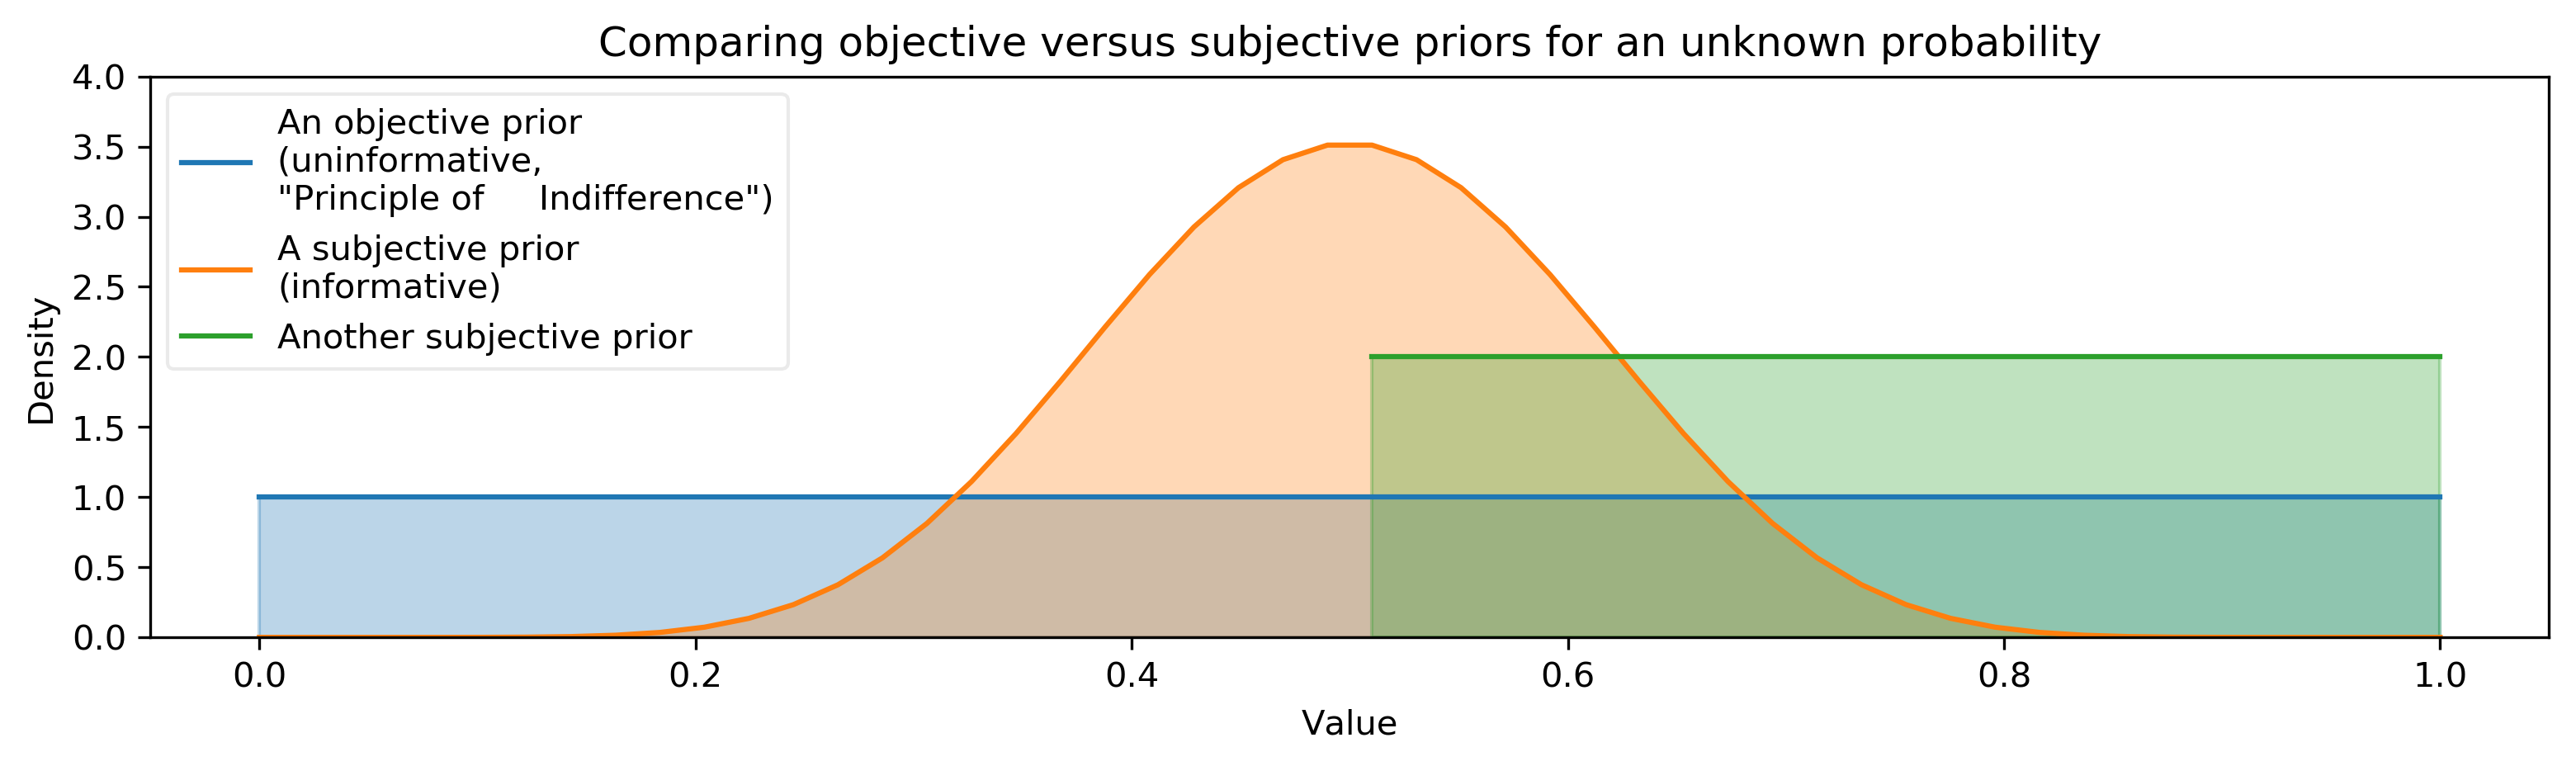

In [2]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
# import seaborn as sns
from IPython.core.pylabtools import figsize

figsize(12.5,3)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

x = np.linspace(0,1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

p = plt.plot(x, y1,
    label='An objective prior \n(uninformative, \n"Principle of\
     Indifference")')
plt.fill_between(x, 0, y1, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x, y2,
     label='A subjective prior \n(informative)')
plt.fill_between(x, 0, y2, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x[25:], 2*np.ones(25), label="Another subjective prior")
plt.fill_between(x[25:], 0, 2, color=p[0].get_color(), alpha=0.3)


plt.ylim(0, 4)
leg = plt.legend(loc="upper left")
leg.get_frame().set_alpha(0.4)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Comparing objective versus subjective priors for an unknown probability");

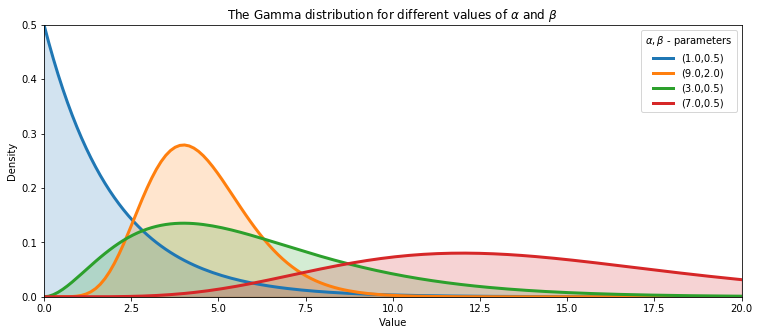

In [3]:
figsize(12.5, 5)
gamma = stats.gamma

parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001, 20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = plt.plot(x, y, label="(%.1f,%.1f)"%(alpha,beta), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)

plt.legend(title=r"$\alpha, \beta$ - parameters")
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(r"The Gamma distribution for different values of $\alpha$ and $\beta$");

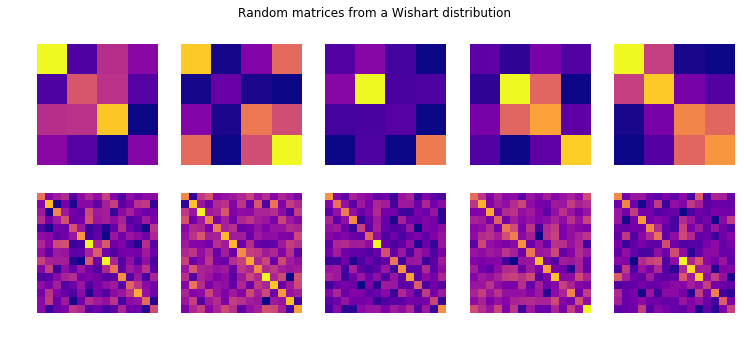

In [4]:
import pymc as pm

n = 4
hyperparameter = np.eye(n)
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
                cmap=plt.cm.plasma)
    ax.axis("off")

n = 15
hyperparameter = 10*np.eye(n)
for i in range(5, 10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
                cmap=plt.cm.plasma)
    ax.axis("off")

plt.suptitle("Random matrices from a Wishart distribution");

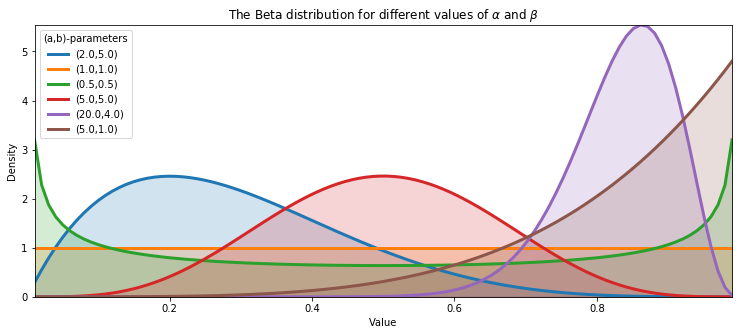

In [5]:
figsize(12.5, 5)

params = [(2,5), (1,1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
  y = beta.pdf(x, a, b)
  lines = plt.plot(x, y, label="(%.1f,%.1f)"%(a,b), lw = 3)
  plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
  plt.autoscale(tight=True)

plt.ylim(0)
plt.legend(loc='upper left', title="(a,b)-parameters")
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(r"The Beta distribution for different values of $\alpha$ and $\beta$");

Text(0.5,1,'Convergence of posterior distributions (with different priors) as we observe more and more information')

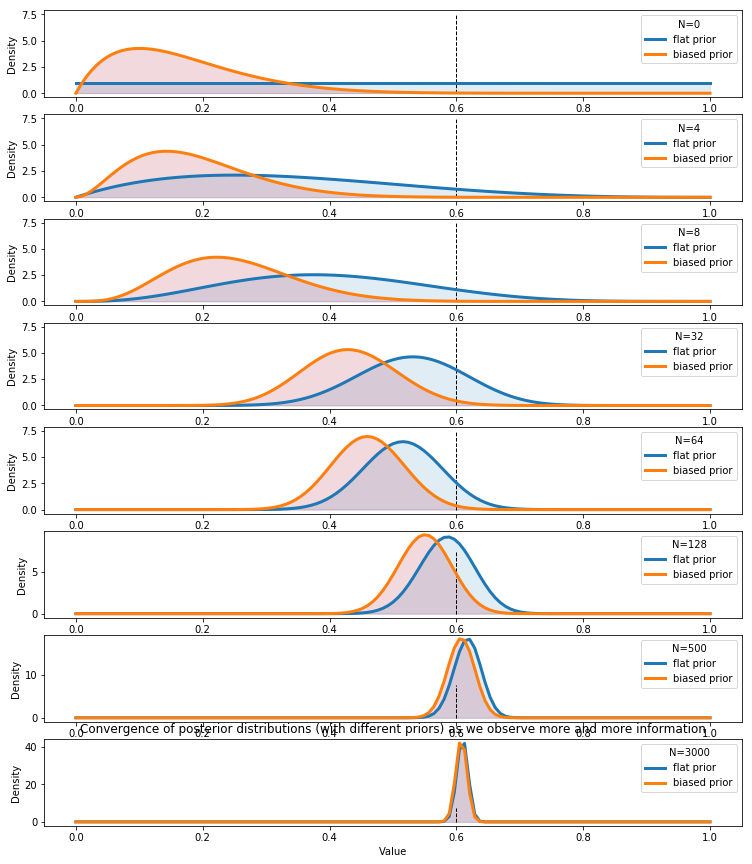

In [6]:
figsize(12.5, 15)

p = 0.6
beta1_params = np.array([1.,1.])
beta2_params = np.array([2,10])
beta = stats.beta

x = np.linspace(0.00, 1, 125)
# data = pm.rbernoulli(p, size=500)

plt.figure()
for i,N in enumerate([0, 4, 8, 32, 64, 128, 500, 3000]):
#     s = data[:N].sum()
    s = pm.rbernoulli(p, size = N).sum()
    plt.subplot(8, 1, i+1)
    params1 = beta1_params + np.array([s, N-s])
    params2 = beta2_params + np.array([s, N-s])
    y1,y2 = beta.pdf(x, *params1), beta.pdf(x, *params2)
    plt.plot(x, y1, label="flat prior", lw =3)
    plt.plot(x, y2, label="biased prior", lw= 3)
    plt.fill_between(x, 0, y1, color="#348ABD", alpha=0.15)
    plt.fill_between(x, 0, y2, color="#A60628", alpha=0.15)
    plt.legend(title="N=%d"%N)
    plt.vlines(p, 0.0, 7.5, linestyles="--", linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.title("Convergence of posterior distributions (with different priors) as we observe more and more information")